**Introduction**

Starting in the 1990s, machine learning has quickly become the most popular subfield of AI. This trend has also been driven by the availability of faster computing and a plethora of diverse data sets.
A machine learning algorithm transforms its input data into meaningful outputs by a process known as representations. Representations are transformations of the input data, to represent it closer to the expected output.
Conventional machine learning focuses on learning only one or two layers of representations of the input data rendering them insufficient for solving human perception problems like image classification, text-to-speech translation, handwriting transcription, etc.
In contrast, deep learning makes use of tens/hundreds of successive layers of representations. Each hidden layer uses an activation function which carries out the transformation of the data coming from a previous layer.
As a result deep learning is better than conventional machine learning algorithms for these “perceptual” tasks, which has resulted in generating a huge interest in this subfield of AI in recent years.

**Aim of practical:**

In this practical you will learn the fundamentals of building a simple feedforward deep neural network (DNN), which is the foundation for generating more advanced deep learning models.

To build a feedforward DNN we need four key components:

Input data

A pre-defined network architecture;

A feedback mechanism to help the network learn;

A model training approach.

During this practical we will go through the four stages of building a DNN using the library TensorFlow/Keras.

**Dataset**

For the purposes of this practical, we will import the dataset MNIST which is a subset of a larger set available from the National Institute of Standards and Technology (NIST) (http://yann.lecun.com/exdb/mnist/). The MNIST database contains handwritten examples of the 10 digits (0-9) represented as 28x28 grayscale images. It has a training set of 60,000 examples, and a test set of 10,000 examples. See an example in Figure 1.
The MNIST database is widely used for training and testing DNNs to achieve near human performance of handwriting recognition.

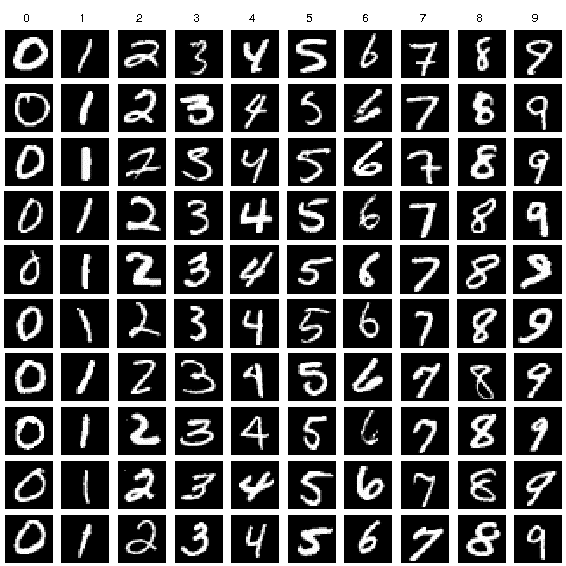

In [ ]:
# install tensorflow and other required packages
# !pip install tensorflow pandas numpy matplotlib

In [1]:
# import libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data preparation**

**Task 1:** Extract train/test images and labels

In [2]:
# Task 1 — Extract train/test images and labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten 28x28 -> 784
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

**Task2:** standardize the train and test data by dividing each dataset by 255.

NOTE: For grayscale images pixel values range between 0-255. Typically zero is taken to be black, and 255 is taken to be white. Values in between make up the different shades of gray.

In [3]:
# Task 2 — Standardize pixel values by dividing by 255
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

Machine learning models require all input and output variables to be numeric. Since for classification tasks the class variable is categorical, we must encode it to numbers before you can fit and evaluate a model. Since we are working with a multinomial response (0–9), keras requires our response to be a one-hot encoded matrix, which can be accomplished with the keras function to_categorical(). You can find an comrehensive expalantion of how one-hot encoding is performed in this online post https://www.educative.io/blog/one-hot-encoding

**Task 3:** convert the vector containing the train set class labels into a matrix with 10 columns, one for each category.

In [4]:
# Task 3 — One-hot encode labels (10 classes)
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh  = to_categorical(y_test,  num_classes=10)

**Task 4:** Change the column names for the mnist_y matrix to be between 0-9. Print the first few rows in the console to see if it has worked.

In [5]:
# Task 4 — Set one-hot column names to 0–9 and print first rows
df_y_train = pd.DataFrame(y_train_oh, columns=[str(i) for i in range(10)])
print(df_y_train.head())

     0    1    2    3    4    5    6    7    8    9
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


**Network Architecture**

The next stage is to decide the network architecture by defining: a) the number of layers b) the number of nodes c) the activation function(s)

As mentioned during the lecture, the number of input nodes = the number of features, and the number of output nodes = the number of classes (outcomes) which are both fixed. What we need to decide is the number of hidden layers and nodes.

**Hidden Layers**

When dealing with many features and, therefore, many nodes, training deep models with many hidden layers can be computationally more efficient than training a single layer network with the same number of high volume nodes. Consequently, the goal is to find the simplest model with optimal performance.

**Implement architecture**

In this example we will create three hidden layers the first with 256 nodes, the second with 128, the third 64 nodes, followed by an output layer with 10 nodes. NOTE In the first layer we also need to provide the input_shape which is equal the number of features in the dataset (input nodes). We also need to specify the activation function in each layer.

**Task 5:** Fill in the missing arguments in the following code, based on the information provided above. Also, provide a suitable activation function for each layer. The first one has been done for you.

In [6]:
# Task 5 — Build the DNN architecture (256 → 128 → 64 → 10)
model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64,  activation="relu"),
    layers.Dense(10,  activation="softmax"),
])

Now print the model architecture using the function summary().

**Print the model summary**

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

**Backpropagation**

Backpropagation is the process of adjusting the weights across all the node connections in the network to improve model accuracy. In backpropagation we need to define the following two parameters:

the loss function

the optimizer

The loss function is used to measure performance. For regression problems this is normally the mean squared error (MSE) and for classification problems it is commonly binary and multi-categorical cross entropy, depending on the classification task.

The optimizer, defines the variant of mini-batch stochastic gradient descent (SGD) applied in the backpropagation process. These variants differ mainly in how fast they descend the gradient (controlled by the learning rate).

Backpropagation is incorporated within the DNN with the function compile().

**Task 6:** In the following chunk select categorical_crossentropy for the loss function, keras.optimizers.RMSprop() for the optimizer and accuracy metrics.

In [8]:
# Task 6 — Compile (loss, optimizer, metrics)
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"]
)

**Train the model**


Previously we created a base model. In the next step we will train it with the mnist trainset.

To train the model we call fit() with the training data and specify key parameters such as:

batch_size: number of samples per gradient update (often 32, 64, 128, …)

epochs: how many passes the model makes over the entire training set

validation_split: fraction of the training data held out for validation

verbose: controls training output (0 = silent, 1 = progress bar, 2 = one line per epoch)

**Task 7:** Fill in the missing arguments in the following code based on the suggestion provided

In [9]:
# Task 7 — Fit the model (choose epochs, batch_size, validation_split)
history1 = model.fit(
    x_train,
    y_train_oh,
    epochs=30,           # choose 20-50
    batch_size=128,
    validation_split=0.2,  # choose 0.2-0.5
    verbose=0
)

**Display training output + plot loss/accuracy**

In [10]:
print(history1.history.keys())  # shows recorded metrics

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


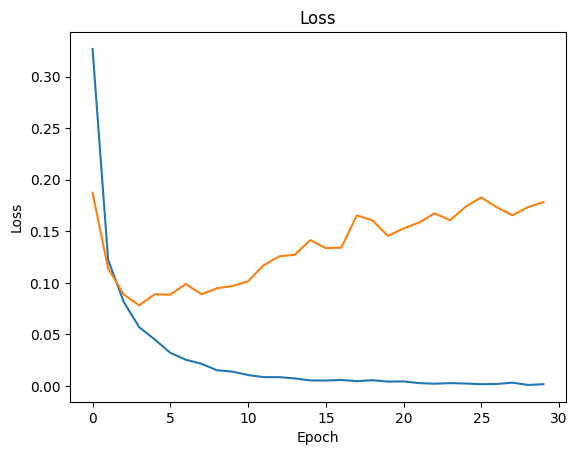

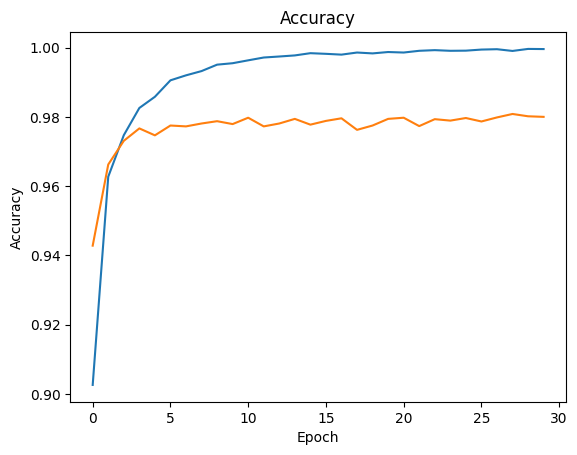

In [13]:
# Plotting
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Make predictions**

**Task 8:** Use the predict() function to make predictions for the class of the data in the test set

In [17]:
# Task 8 — Predict on the test set
predictions = model.predict(x_test, verbose=0)
print(predictions)

[[2.0626109e-22 2.5003727e-21 9.4240244e-17 ... 1.0000000e+00
  3.2018705e-21 2.7977824e-16]
 [8.9317182e-24 5.4978444e-17 1.0000000e+00 ... 7.1978391e-24
  1.7370324e-21 3.7205528e-32]
 [9.0457003e-15 1.0000000e+00 6.5982347e-16 ... 5.8901295e-10
  3.1862737e-14 1.4466178e-15]
 ...
 [1.2616977e-26 1.1468702e-20 3.8148068e-30 ... 2.7646004e-21
  2.9281479e-25 1.2650983e-14]
 [3.1638963e-33 6.1888594e-36 4.4277481e-32 ... 2.4908748e-26
  3.3814726e-15 1.0252517e-27]
 [5.8089243e-23 8.1110998e-33 1.8105368e-24 ... 2.3136745e-37
  1.6847966e-22 1.3526728e-29]]


**Evaluate**

To assess how good the model is at predicting the correct digit we can use the evaluate() function.

**Task 9:** Fill in the arguments in the function below. The first argument should be the test data and the second the test labels.

In [18]:
# Task 9 — Evaluate on the test set
evaluation = model.evaluate(x_test, y_test_oh, verbose=0)
print(evaluation)  # [loss, accuracy]

[0.12793011963367462, 0.982200026512146]


What is the accuracy you get?

**Model optimisation**

As with conventional ML algorithms, we can take some steps to optimise the performance of DNNs. These often include the following processes:

Batch Normalisation

Regularisation

Learning rate adjustment.


For the purposes of this practical we will apply a regularisation technique called dropout. Dropout randomly sets a fraction of activations to zero during training, which can help reduce overfitting. In TensorFlow/Keras we add dropout with layers.Dropout(rate).

**Task 10:** Add a dropout step after each hidden layer in the model you built earlier. Set the rate to 0.25. Summarise the model and then compile it. Repeat Tasks 7-9 to evaluate the new model. Can you see any improvements in the accuracy and loss?

In [19]:
# Task 10 — Add Dropout (rate 0.25) after each hidden layer, then re-train and evaluate
model2 = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(784,)),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax"),
])

Now print the new model architecture.

In [20]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

**Finally compile the new model**

In [21]:
model2.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"]
)

**Build Confusion Matrix**

Now that we have built a final model let's visualise the confusion matrix.

The first step will be to create a dataframe with the actual and predicted values for the test set. Run the following code to create the dataframe.

In [24]:
history2 = model2.fit(
    x_train,
    y_train_oh,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

In [25]:
predictions2 = model2.predict(x_test, verbose=0)
evaluation2 = model2.evaluate(x_test, y_test_oh, verbose=0)

In [26]:
print(evaluation2)  # [loss, accuracy]

[0.1260465532541275, 0.984000027179718]


Now we can create the confusion matrix.

**Task 11:** Use the eval_df (or your prediction outputs) to extract the actual and predicted classes. Then create a confusion matrix using pandas.crosstab(ACTUAL, PREDICTED).

In [27]:
# Task 11 — Confusion matrix (ACTUAL vs PREDICTED)

# predicted class = argmax across 10 probabilities
y_pred = np.argmax(predictions2, axis=1)
y_true = y_test  # already 0..9 integers

cm = pd.crosstab(
    pd.Series(y_true, name="ACTUAL"),
    pd.Series(y_pred, name="PREDICTED")
)

In [29]:
print(cm)

PREDICTED    0     1     2    3    4    5    6     7    8    9
ACTUAL                                                        
0          973     1     1    0    0    2    1     1    1    0
1            0  1129     3    0    0    0    1     1    1    0
2            2     0  1018    1    3    0    0     7    1    0
3            2     0     6  988    0    4    0     4    3    3
4            1     1     5    0  961    0    3     2    2    7
5            1     0     0    5    1  878    2     0    4    1
6            3     3     0    1    1    3  946     0    1    0
7            2     1     5    1    0    0    0  1014    2    3
8            2     0     3    8    2    3    2     2  949    3
9            0     3     0    2    8    4    1     4    3  984


**Task 12: (Optional)**

If you have time, try the same task as before, but this time change the DNN architecture. You can try 4 hidden layers starting from 512 nodes. You can also play with the parameters of the network, such as different activation functions, different optimizer (optimizer_adam()) and dropout rate.
ask to “improve accuracy” or “compare performance” rather than implying 100% is realistic.